### HW3 计算机模拟 
**汪奕晨 3180105843**

#### 问题重述

用 Metropolis-Hasting 方法抽取服从标准正态分布的随机数：

1. 描述算法思路和步骤；

2. 给出 Python 的实现代码；

3. 进行 N > 40000 的抽取测试，并分析效果；

4. 讨论在实际工作中，能否应用此方法产生正态分布

#### 算法的思路与步骤

用以下的条件分布去作为马尔科夫链的转移函数
$$
y \sim U((x-\mu,x+\mu))
$$
$$
g(y | x) = \frac{1}{2\mu}
$$
$\mu$为转移区间的半径，在接下来的例子里，我们会分别取$\mu = 1,3,5$进行测试

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def f(x): #概率密度函数，未归一化
    return np.exp(-x**2/2)

# \mu = 1,3,5的三个函数
def trans(x):
    return np.random.rand() * 2 - 1 + x

def trans2(x):
    return np.random.rand() * 6 -3 + x

def trans3(x):
    return np.random.rand() * 10 -5 + x

代码实现的技巧：
+ 使用np.min函数求得list or nparray中的最小值
+ 可以将函数名作为参数传入以适配不同的模型

In [3]:
N = 500000 # 总次数
start = 10000 # 认为Start后的数据达到稳定，舍弃Start前的数据

def norm_gen(func = trans,N = 100000, start = 10000, x0=0):
    res = np.zeros(N) # 保存结果的向量
    x = x0 #初值
    for i in range(N):
        y = func(x)
        h = np.min([1, f(y)/f(x)])
        u = np.random.rand()
        if u < h:
            x = y
        res[i] = x
    return res

res1 = norm_gen(trans)
res2 = norm_gen(trans2)
res3 = norm_gen(trans3)

绘图的技巧：
+ plt.hist返回的参数为一个元组，分别是x轴点列与y轴点列，可以通过num快速的计算得到正态分布曲线
+ 也可以通过stats中快速得到正态分布的PDF

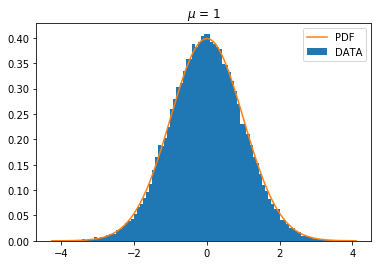

In [4]:
# 绘制模块
num = plt.hist(res1[start:], bins = 100, normed = 1, label='DATA')
y = 1/np.sqrt(2*np.pi) * f(num[1]) 
plt.plot(num[1], y, label = 'PDF')
plt.legend()
plt.title(r'$\mu$ = 1')
plt.show()

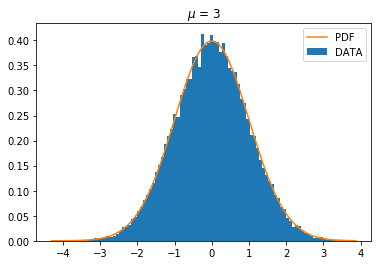

In [29]:
num = plt.hist(res2[start:], bins = 100, normed = 1, label='DATA')
y = 1/np.sqrt(2*np.pi) * f(num[1]) 
plt.plot(num[1], y, label = 'PDF')
plt.legend()
plt.title(r'$\mu$ = 3')
plt.show()

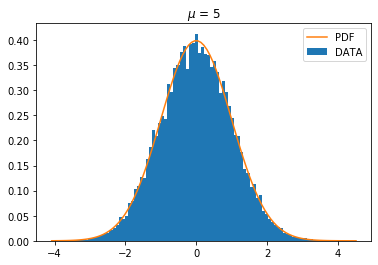

In [30]:
num = plt.hist(res3[start:], bins = 100, normed = 1, label='DATA')
y = 1/np.sqrt(2*np.pi) * f(num[1]) 
plt.plot(num[1], y, label = 'PDF')
plt.legend()
plt.title(r'$\mu$ = 5')
plt.show()

通过stats模块中的shapiro，kstest, normaltest模块去测试结果的质量

In [33]:
# 测试模块
def norm_eval(res):
    # 使用三种评价函数去评价得到数据是否符合正态分布
    print(stats.shapiro(res[start:]))
    print(stats.kstest(res[start:], 'norm'))
    print(stats.normaltest(res[start:]))

norm_eval(res1)
norm_eval(res2)
norm_eval(res3)

(0.9999579787254333, 0.31043457984924316)
KstestResult(statistic=0.0048906702991928785, pvalue=0.026992037787342556)
NormaltestResult(statistic=5.28765669220559, pvalue=0.07108859619521944)
(0.9999512434005737, 0.18141603469848633)
KstestResult(statistic=0.004523832611923018, pvalue=0.050258290586918004)
NormaltestResult(statistic=0.9658816753809056, pvalue=0.6169663234464304)
(0.999873697757721, 0.0001766344503266737)
KstestResult(statistic=0.005881278610805785, pvalue=0.003954299999141431)
NormaltestResult(statistic=1.9633971855834225, pvalue=0.3746741392448867)


#### 结果分析
关于转移的区间半径$\mu$,当$\mu=1,3,5$时，综合三种正态分布检验，$\mu$越小，抽取的效果越好，这可能是由于单次转移的距离变近，偶然的因素被削弱。但相比于先前的AR方法等，抽取的质量仍然较差。为了提高抽取质量，一种思路是舍弃部分样本，改进后得到Gibbs算法。

此外，Metropolis-Hasting方法是基于Markov Chain的算法，需要在一定的步骤后才能达到稳定。我们也很难判断达到稳定的时刻，从而难以掌握截断的时机。

#### 结论
上述方法可以产生满足正态分布的随机数，但抽取质量较差。若要应用在实际生活中，对于对抽取质量要求较高的场景无法胜任，但在可以容忍质量较差的场景下可以有较快的抽取速度。但对于只知道概率密度函数（可以未归一化）的映射结果的，即给出$x$可以得到$f(x)$而不能得到f(x)的解析式，积分值等信息的场景，Metropolis-Hasting方法可以在该情况下得到对应分布的抽取值。